In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## Importing the Data and Preprocessing EDA

In [8]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Clustering\EastWestAirlines.csv")

In [9]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
data = df.drop(['ID#','Balance'], axis = 1)
data.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,1,1,174,1,0,0,7000,0
1,0,1,1,1,215,2,0,0,6968,0
2,0,1,1,1,4123,4,0,0,7034,0
3,0,1,1,1,500,1,0,0,6952,0
4,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0
Award?,3999.0,0.370343,0.482957,0.0,0.0,0.0,1.0,1.0


## Normalizing the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.        , 0.5       , 0.        , ..., 0.        , 0.16879672,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [15]:
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_df.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


## Creating Dendogram or Tree of Clustering

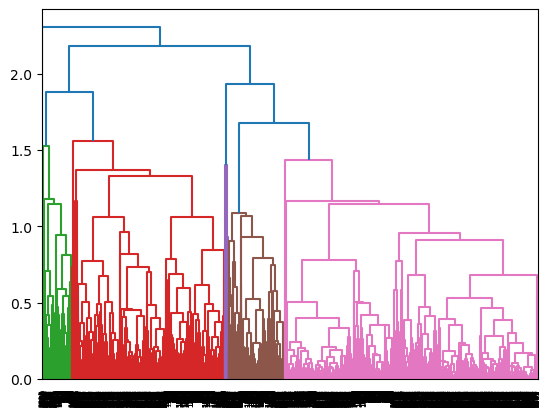

In [16]:
dendogram = sch.dendrogram(sch.linkage(scaled_df , method = 'complete'))

## Model Building and Prediction

In [17]:
model = AgglomerativeClustering(n_clusters= 3 , memory='euclidean', linkage='complete', distance_threshold=None)

In [18]:
pred_y = model.fit_predict(scaled_df)

In [19]:
pred_y

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [20]:
scaled_df['Cluster'] = pred_y
scaled_df

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [21]:
set(pred_y)

{0, 1, 2}

In [22]:
scaled_df.groupby('Cluster').mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,
0,0.007875,0.175911,0.009311,0.002179,0.038945,0.106775,0.007454,0.012626,0.460687,0.002377
1,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000
2,0.021547,0.417233,0.003739,0.004589,0.109261,0.181351,0.026033,0.046266,0.558115,1.000000


In [23]:
model.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

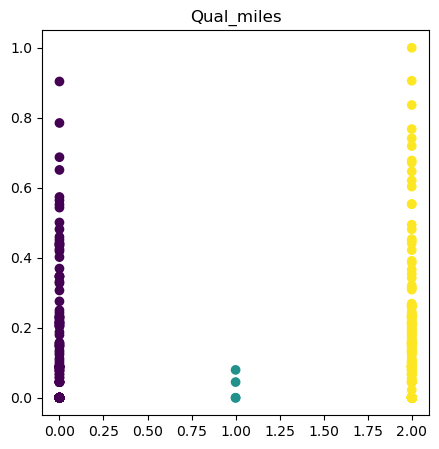

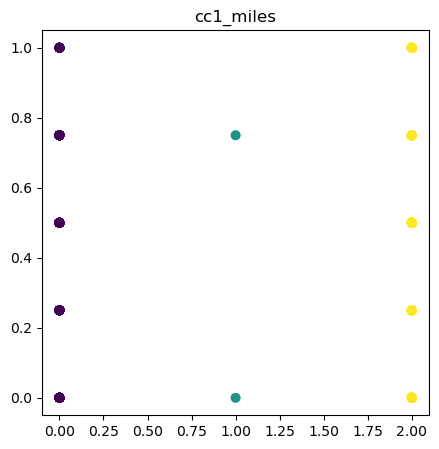

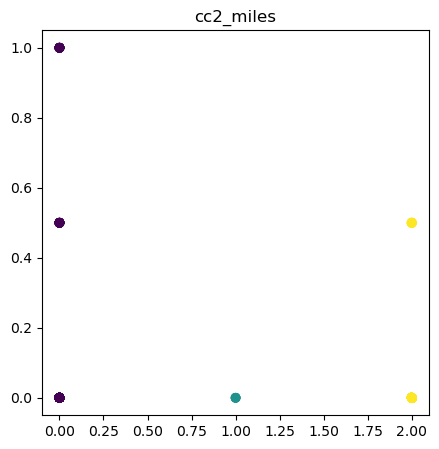

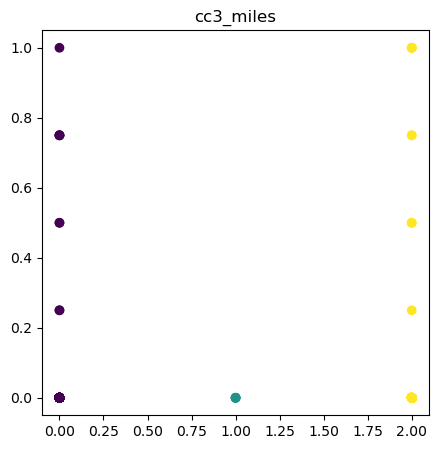

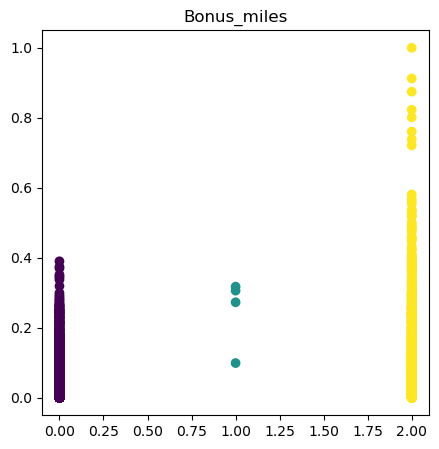

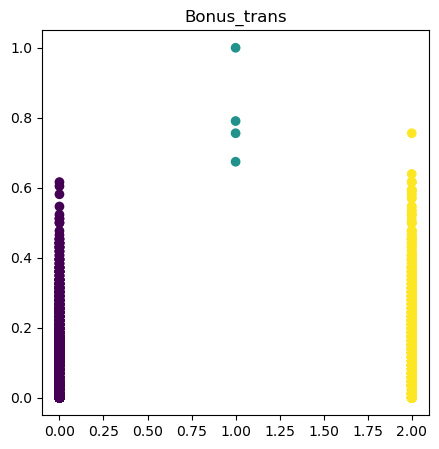

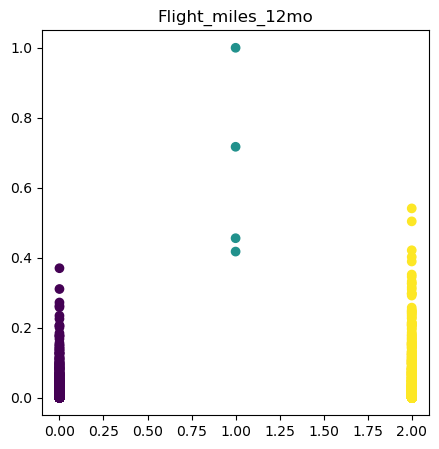

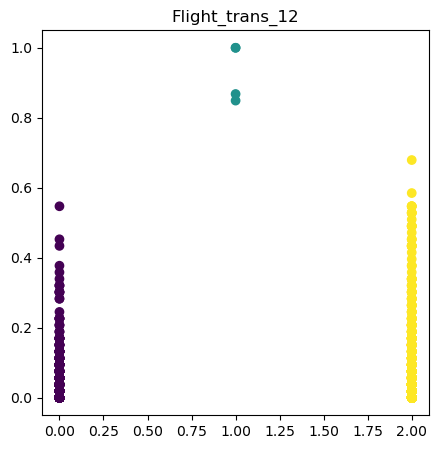

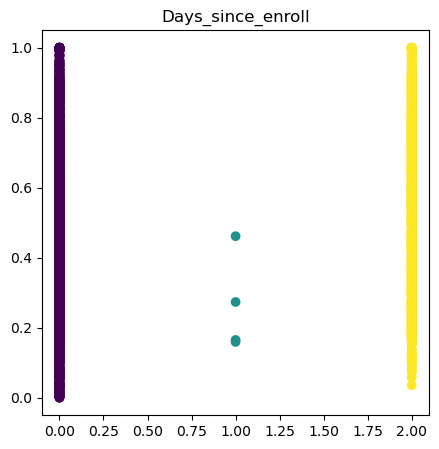

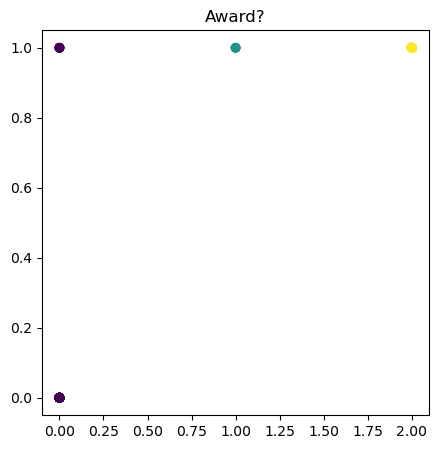

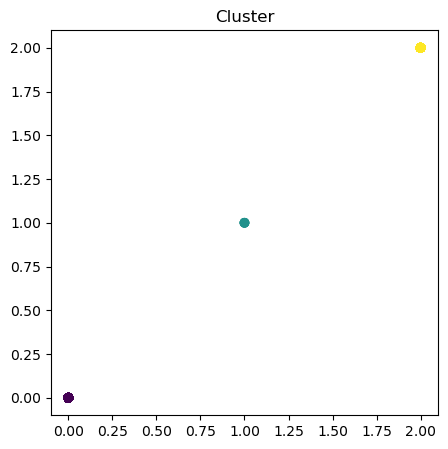

In [25]:
# Visualising the Data

for i in scaled_df.columns:
    plt.figure(figsize = (5,5))
    plt.scatter(data=scaled_df , x = 'Cluster' , y = i ,  c = model.labels_)
    plt.title(i)
    plt.show()